In [1]:
from evals_header import *

pd.set_option('display.max_rows', 200)

In [40]:
# Input

reads_fn = 'simulations/reads/t2thumanChrY_sr0.0001090909090909091_dr0.0009818181818181818_i0.0009090909090909091_sd7361077429744071834_lmn100_lmx1000000_lavg9000_ls7000_dp10_rm20.fasta'
#eskemap_fn = 'out/eske100.out'
minimap_fn = 'out/minimap.out'
#sweep_fn = 'sweep-pairs-noblacklist.out'
sweep_fn = 'sweep.out'
#sweep_fn = 'sweep-normalized-intervals.out'

# Simulated reads
simulated_df = parse_fasta_metadata(reads_fn)

# Sweep algo
sweep_df = pd.read_csv(sweep_fn, sep='\t', header=None)
sweep_df.columns = ['query_name', 'k', 'P_sz','p_sz', 'matches', 'ref_start', 'ref_end', 'minx', 'J']
sweep_df['J'] = sweep_df['J'].round(3)
sweep_df['alignment_bps'] = sweep_df['ref_end'] - sweep_df['ref_start']
sweep_df = pd.merge(simulated_df, sweep_df, on='query_name', how='left')

# Minimap
minimap_df = pd.read_csv(minimap_fn, sep='\t', header=None)
minimap_df.columns = ['query_name', 'query_len', 'query_start', 'query_end', 'strand', 'ref_name', 'ref_len', 'ref_start', 'ref_end', 'match_bases', 'total_bases', 'map_quality', 'cigar']

# Eskemap
#eskemap_df = pd.read_csv(eskemap_fn, sep='\t', header=None)
#eskemap_df.columns = ['query_name', 'ref_start', 'ref_end', 'jaccard_scoreX1000']


In [41]:
# Compare

add_overlap_column(sweep_df, minimap_df, 'overlap')

In [43]:
# Output

correct = sweep_df[sweep_df['overlap'] > 0.1].shape[0]
all = sweep_df.shape[0]
accuracy = correct / all

print('  Sweep accuracy: {:.2%} ({} / {})'.format(accuracy, correct, all))
print('  Sweep avg overlap: {:.8}'.format(sweep_df['overlap'].mean()))
sweep_df.to_csv('all.csv', sep='\t', index=False)
#plot_all_columns(sweep_df)


  Sweep accuracy: 97.62% (6776 / 6941)
  Sweep avg overlap: 0.90833488


,query_name,from_ref_sim,to_ref_sim,read_len,k,P_sz,p_sz,matches,ref_start,ref_end,minx,J,alignment_bps,overlap,start_diff
1648,s_1648,35938034,35938246,212,15,213,34,267509,52391705,52391878,62,0.886,173,0.0,16453671
4365,s_4365,31949886,31950572,686,15,689,120,615093,31949903,31950565,227,0.883,662,0.0,17
5123,s_5123,35684406,35684697,291,15,291,53,224937,35684422,35684691,96,0.828,269,0.0,16


Number of misaligned reads: 46


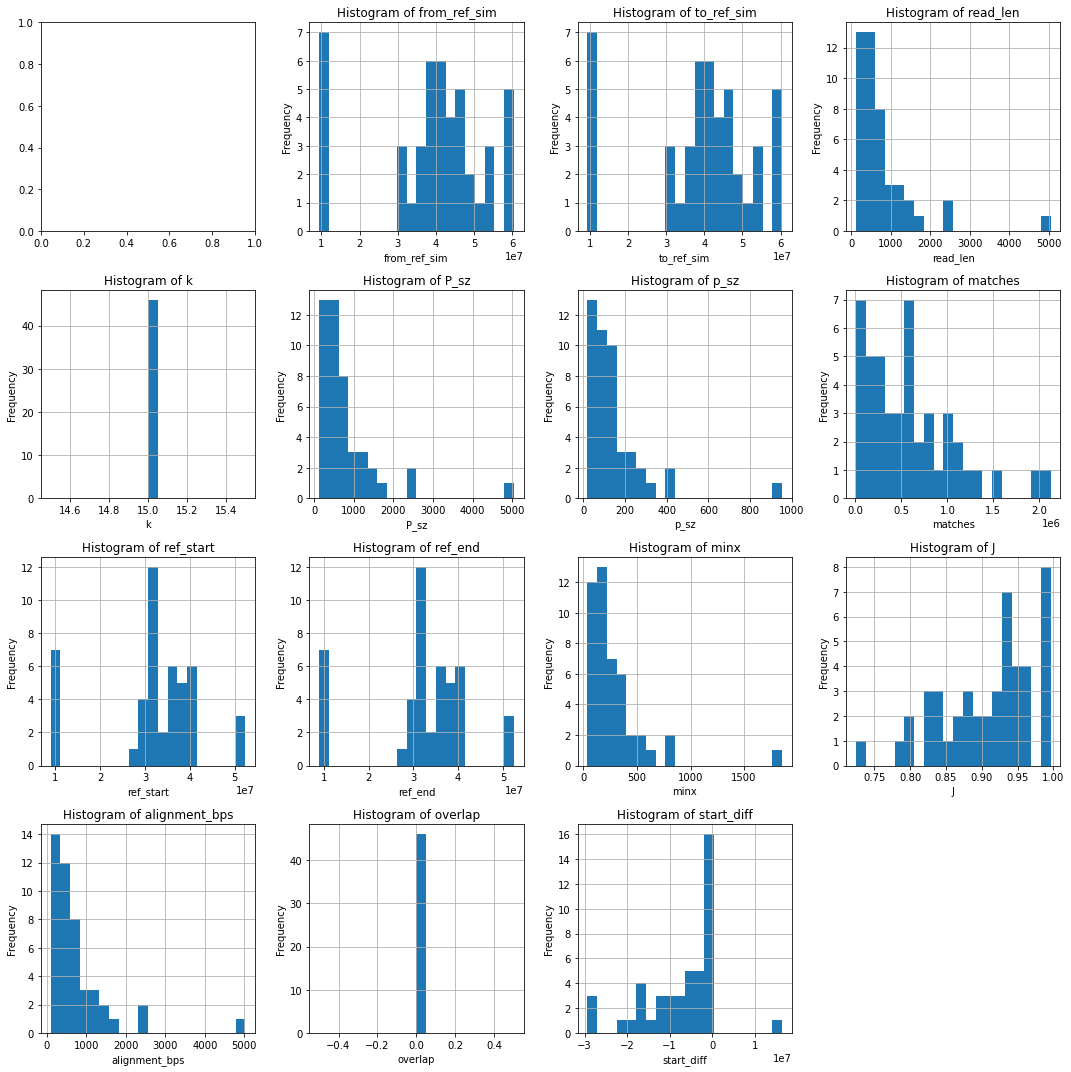

,query_name,from_ref_sim,to_ref_sim,read_len,k,P_sz,p_sz,matches,ref_start,ref_end,minx,J,alignment_bps,overlap,start_diff
100,s_100,43510727,43511172,445,15,443,82,472882,35788651,35789076,142,0.780,425,0.0,-7722076
247,s_247,32110413,32110778,365,15,366,70,427737,30102266,30102605,139,0.986,339,0.0,-2008147
283,s_283,42399887,42401255,1368,15,1372,266,1555763,32721555,32722898,514,0.928,1343,0.0,-9678332
444,s_444,47116197,47116314,117,15,118,19,126102,30057636,30057729,37,0.949,93,0.0,-17058561
653,s_653,57886856,57887204,348,15,349,59,288095,29326752,29327073,117,0.983,321,0.0,-28560104
940,s_940,31494381,31494733,352,15,353,65,554525,31487253,31487589,129,0.985,336,0.0,-7128
1086,s_1086,48713243,48713538,295,15,295,59,355239,37590144,37590419,110,0.873,275,0.0,-11123099
1246,s_1246,10691886,10694253,2367,15,2371,430,32032,10570417,10572759,829,0.937,2342,0.0,-121469
1381,s_1381,10738812,10740004,1192,15,1195,212,20899,10571064,10572240,409,0.927,1176,0.0,-167748
1548,s_1548,9367007,9368535,1528,15,1529,268,12417,9022208,9023710,535,0.996,1502,0.0,-344799


In [24]:
sweep_misaligned_df = sweep_df[sweep_df['overlap'] < 0.1]
sweep_misaligned_df = sweep_misaligned_df[sweep_misaligned_df['overlap'] >= 0]  # remove reads not aligned by minimap
sweep_misaligned_df['start_diff'] = sweep_misaligned_df['ref_start'] - sweep_misaligned_df['from_ref_sim']

display(sweep_misaligned_df[sweep_misaligned_df['start_diff'] > 0])

print('Number of misaligned reads:', sweep_misaligned_df.shape[0])
sweep_misaligned_df.to_csv('misalignments.csv', sep='\t', index=False)
#plot_all_columns(sweep_misaligned_df)
display(sweep_misaligned_df)    